In [1]:
import handcalcs.render
import math as mt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st

Correção

Equinócio de outono - 21/mar

In [2]:
Mes=3     #Março
Dia=21     #dia da semana
Cor=-1    #corre
L_O=-45       #Longitude Hora Legal
L =-46.6388  #Longitude 
L_a= -23.5489  #Latitude

numero de dias do ano 

In [3]:
n= Dia + (Mes -1)*30 +Cor


HORA SOLAR 

In [15]:
B= (360/364)*(n-81)
B

-0.989010989010989

In [5]:
E= 9.87*np.sin(np.radians(2*B))-7.53*np.cos(np.radians(B))-1.5*np.sin(np.radians(B))



In [6]:

Corhora= (4*(L_O-L)+E)/60


In [7]:
df=pd.read_csv("Hora Legal.csv" , encoding ='UTF-8' , sep=";")



In [8]:

df['HS']= df['HL']+Corhora


ANGULO HORARIO 

In [9]:

df['Omega']= (df['HS']-12)*15


DECLINAÇÃO SOLAR 

In [10]:

sigma= 23.45*np.sin(np.radians(360/365*(284+n)))

ANGULO ZENITAL

In [11]:

df['teta_z']= np.degrees(np.arccos(np.sin(np.radians(sigma))*np.sin(np.radians(L_a))+np.cos(np.radians(sigma))*np.cos(np.radians(L_a))*np.cos(np.radians(df['Omega']))))



In [16]:
df['Sombra']=np.tan(np.radians(df['teta_z']))
df


,HL,HS,Omega,teta_z,Sombra
0,5.00,4.978526,-105.322115,103.852199,-4.055318
1,5.50,5.478526,-97.822115,97.004417,-8.139159
2,5.99,5.968526,-90.472115,90.271512,-211.023393
3,6.50,6.478526,-82.822115,83.260453,8.462184
4,7.00,6.978526,-75.322115,76.402983,4.134447
5,7.50,7.478526,-67.822115,69.582857,2.686458
6,8.00,7.978526,-60.322115,62.826106,1.947972
7,8.50,8.478526,-52.822115,56.167504,1.491951
8,9.00,8.978526,-45.322115,49.656942,1.177365
9,9.50,9.478526,-37.822115,43.370340,0.944673


In [21]:
sombra=df.loc[3:26]
sombra


,HL,HS,Omega,teta_z,Sombra
3,6.5,6.478526,-82.822115,83.260453,8.462184
4,7.0,6.978526,-75.322115,76.402983,4.134447
5,7.5,7.478526,-67.822115,69.582857,2.686458
6,8.0,7.978526,-60.322115,62.826106,1.947972
7,8.5,8.478526,-52.822115,56.167504,1.491951
8,9.0,8.978526,-45.322115,49.656942,1.177365
9,9.5,9.478526,-37.822115,43.370340,0.944673
10,10.0,9.978526,-30.322115,37.428919,0.765358
11,10.5,10.478526,-22.822115,32.032604,0.625661
12,11.0,10.978526,-15.322115,27.510295,0.520795


<AxesSubplot:xlabel='HL'>

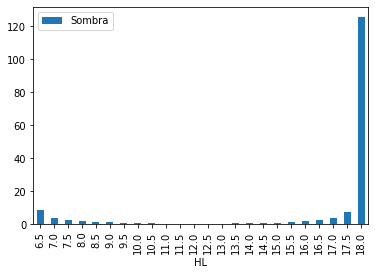

In [22]:
sombra.plot.bar(y='Sombra',x='HL')

ANGULO DO AZIMUTE SOLAR

df['Gama_s']= np.degrees(np.arccos(np.radians(((np.cos(np.radians(df['teta_z'])))* (np.sin(np.radians(df['Omega'])))-(np.sin(np.radians(df['sigma']))))/((np.sin(np.radians(df['teta_z'])))*np.cos(np.radians(df['teta_z']))))))


ANGULO DE INCIDÊNCIA 

df['teta']=(np.sin(np.radians(df['sigma'])))*(np.sin(np.radians(L_a)))
